# Phase II Revisions


Use the following cell (or more if you need them) to make any needed revisions or additions to your Phase II data cleaning. If you were not recommended to make any changes, and don't have any new data sources for Phase III, you may skip this part.


Not Applicable (no changes were made)

## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://datahub.io/sports-data/atp-world-tour-tennis-data/r/5.html
*   Web Collection #1 Source: https://rapidapi.com/marindelija/api/tennis-data1/
*   Web Collection #2 Source: http://tennis28.com/slams/wins_age.html
*   Additional Dataset Source: http://www.protennislive.com/posting/ramr/career_prize.pdf



# Import Statements & Initialization for Insights

In [2]:
# Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql

import getpass
import seaborn as sns

# Retrieving data from exported files from Phase II

df_csv = pd.read_excel('Phase_II_CSV_Data.xlsx')
df_api = pd.read_excel('Phase_II_API_Data.xlsx')
df_html = pd.read_excel('Phase_II_HTML_Data.xlsx')
df_add = pd.read_excel('Phase_II_Additional_Data.xlsx')

# DataFrame copies

t_math_df = df_csv.copy()
t_prizes_df = df_api.copy()
t_places_df = df_html.copy()
t_earns_df = df_add.copy()

# For tennis_places_df (the HTML dataset), the DataFrame
# has been split according to 'Gender' to make visualizations easier

# DataFrame creation for male data

t_places_m_df = t_places_df[t_places_df['Gender'] == 'Male']
t_places_m_df = t_places_m_df.reset_index(drop = True)
t_places_m_df = t_places_m_df.iloc[:,1:]

# DataFrame creation for female data

t_places_f_df = t_places_df[t_places_df['Gender'] == 'Female']
t_places_f_df = t_places_f_df.reset_index(drop = True)
t_places_f_df = t_places_f_df.iloc[:,1:]

# 1. Insights

## 1.1 What are the general trends in Grand Slams won by top players, and are there any differences in males and females?

,Slams Won
Age,
16,5
17,11
18,10
19,17
20,21
21,15
22,14
23,10
24,18


<Figure size 720x720 with 0 Axes>

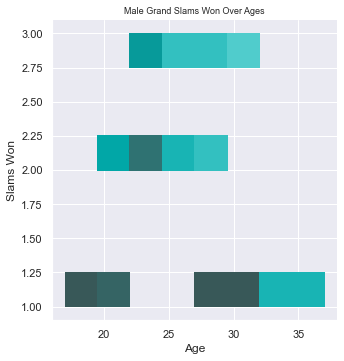

<Figure size 720x720 with 0 Axes>

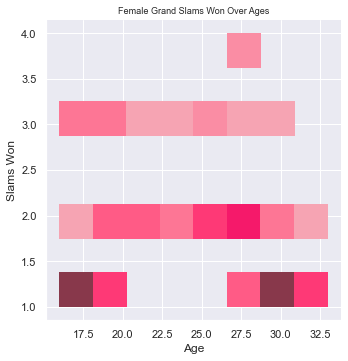

<Figure size 720x720 with 0 Axes>

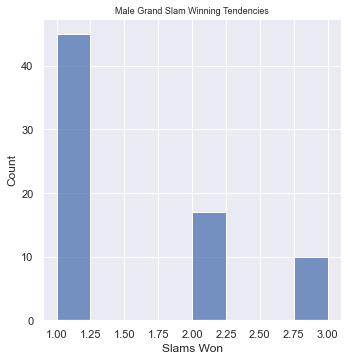

<Figure size 720x720 with 0 Axes>

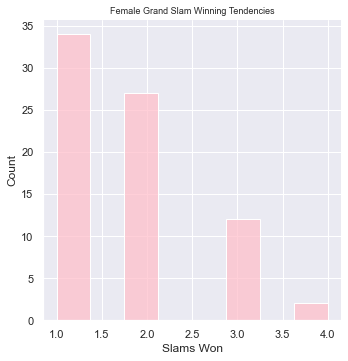

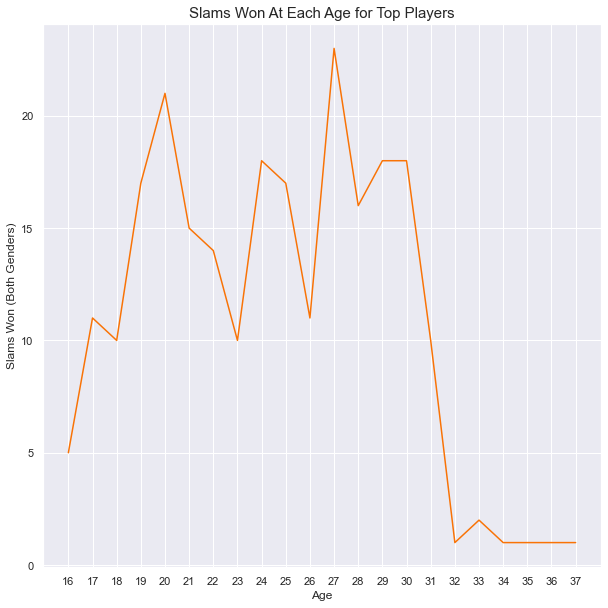

In [4]:

def insight1():
    
    # ---------- INSIGHT 1 ----------
    
    # For the first insight, which revolves around the trends in age
    # and grand slams achieved for top players, while accounting for
    # gender, all the values must be sorted first for data visualization
    
    t_places_m_df.sort_values(by = 'Age', ascending = True, inplace = True)
    t_places_f_df.sort_values(by = 'Age', ascending = True, inplace = True)
    
    # The 'At Age' rows only will be selected, since they show the growth trends
    # for each player over the ages of the player
    
    t_places_at_age_m_df = t_places_m_df[t_places_m_df['Age Clarifier'] == 'At Age']
    t_places_at_age_f_df = t_places_f_df[t_places_f_df['Age Clarifier'] == 'At Age']
    
    # Another trend of interest is how age and grand slams are related
    # regardless of age, which calls for manipulation of data quantitatively
    # (finding the sum of Slams Won at each Age for both Genders)
    
    t_places_both_df = t_places_df[t_places_df['Age Clarifier'] == 'At Age']
    t_places_both_series = t_places_both_df.groupby('Age')['Slams Won'].sum()
    t_places_both_df = t_places_both_series.to_frame()
    
    # ---------- VISUALIZATION FOR INSIGHT 1 ----------
    
    # First setting the theme for visualization
    
    sns.set_theme()
    
    # Now we can create the visualizations of the relations between age
    # and tennis grand slams won for each gender uniquely, which can be
    # done by plotting the data on a distribution plot (displot) for each:
    
    plt.figure(figsize = (10,10))
    sns.displot(data = t_places_at_age_m_df, x = 'Age', y = 'Slams Won', color = 'cyan')
    plt.title('Male Grand Slams Won Over Ages', fontsize = 9)
    plt.savefig('Male Grand Slams Won Over Ages (HTML, Dist Plot)')
    
    plt.figure(figsize = (10,10))
    sns.displot(data = t_places_at_age_f_df, x = 'Age', y = 'Slams Won', color = 'pink')
    plt.title('Female Grand Slams Won Over Ages', fontsize = 9)
    plt.savefig('Female Grand Slams Won Over Ages (HTML, Dist Plot)')
    
    # This is the most preferred method for visualization here because
    # this particular representation allows to see trends within
    # the overall trend of data 
    # (e.g., the stretches of squares horizontally on multiple levels)
    
    # Next step is to create another 2 graphs of the same previous data,
    # but of which centralizes only around counting 'Slams Won' for each gender (no age)... 
    # This is to further build on the previous 2 visualizations by offering a different view
    
    plt.figure(figsize = (10,10))
    sns.displot(data = t_places_at_age_m_df, x = 'Slams Won')
    plt.title('Male Grand Slam Winning Tendencies', fontsize = 9)
    plt.savefig('Male Grand Slam Winning Tendencies (HTML, Bar Graph)')
    
    plt.figure(figsize = (10,10))
    sns.displot(data = t_places_at_age_f_df, x = 'Slams Won', color = 'pink')
    plt.title('Female Grand Slam Winning Tendencies', fontsize = 9)
    plt.savefig('Female Grand Slam Winning Tendencies (HTML, Bar Graph)')
    
    # Lastly, we plot the grouped summed data on Age and Slams Won on a line plot:
    
    plt.figure(figsize = (10,10))
    sns.lineplot(x = 'Age', y = 'Slams Won', color = sns.xkcd_rgb['orange'], data = t_places_both_df)
    plt.xticks(range(16,38))
    
    plt.xlabel('Age')
    plt.ylabel('Slams Won (Both Genders)')
    plt.title('Slams Won At Each Age for Top Players', fontsize = 15)
    
    plt.savefig('Slams Won At Each Age for Top Players (HTML, Line Plot)')
    
    # Returns the DataFrame only on the previous data because this is the
    # most useful for the overall summary of trends (eliminates gender bias)
    
    excel_writer = pd.ExcelWriter('Summary_File_DataFrame_1.xlsx')
    t_places_both_df.to_excel(excel_writer)
    excel_writer.save()
    
    return t_places_both_df
    
############ Function Call ############
insight1()

### 1.1 Insight Explanation

All explanations were provided in the code itself.

## 1.2 How are different characteristics of a tennis match correlated, both for winners and losers?

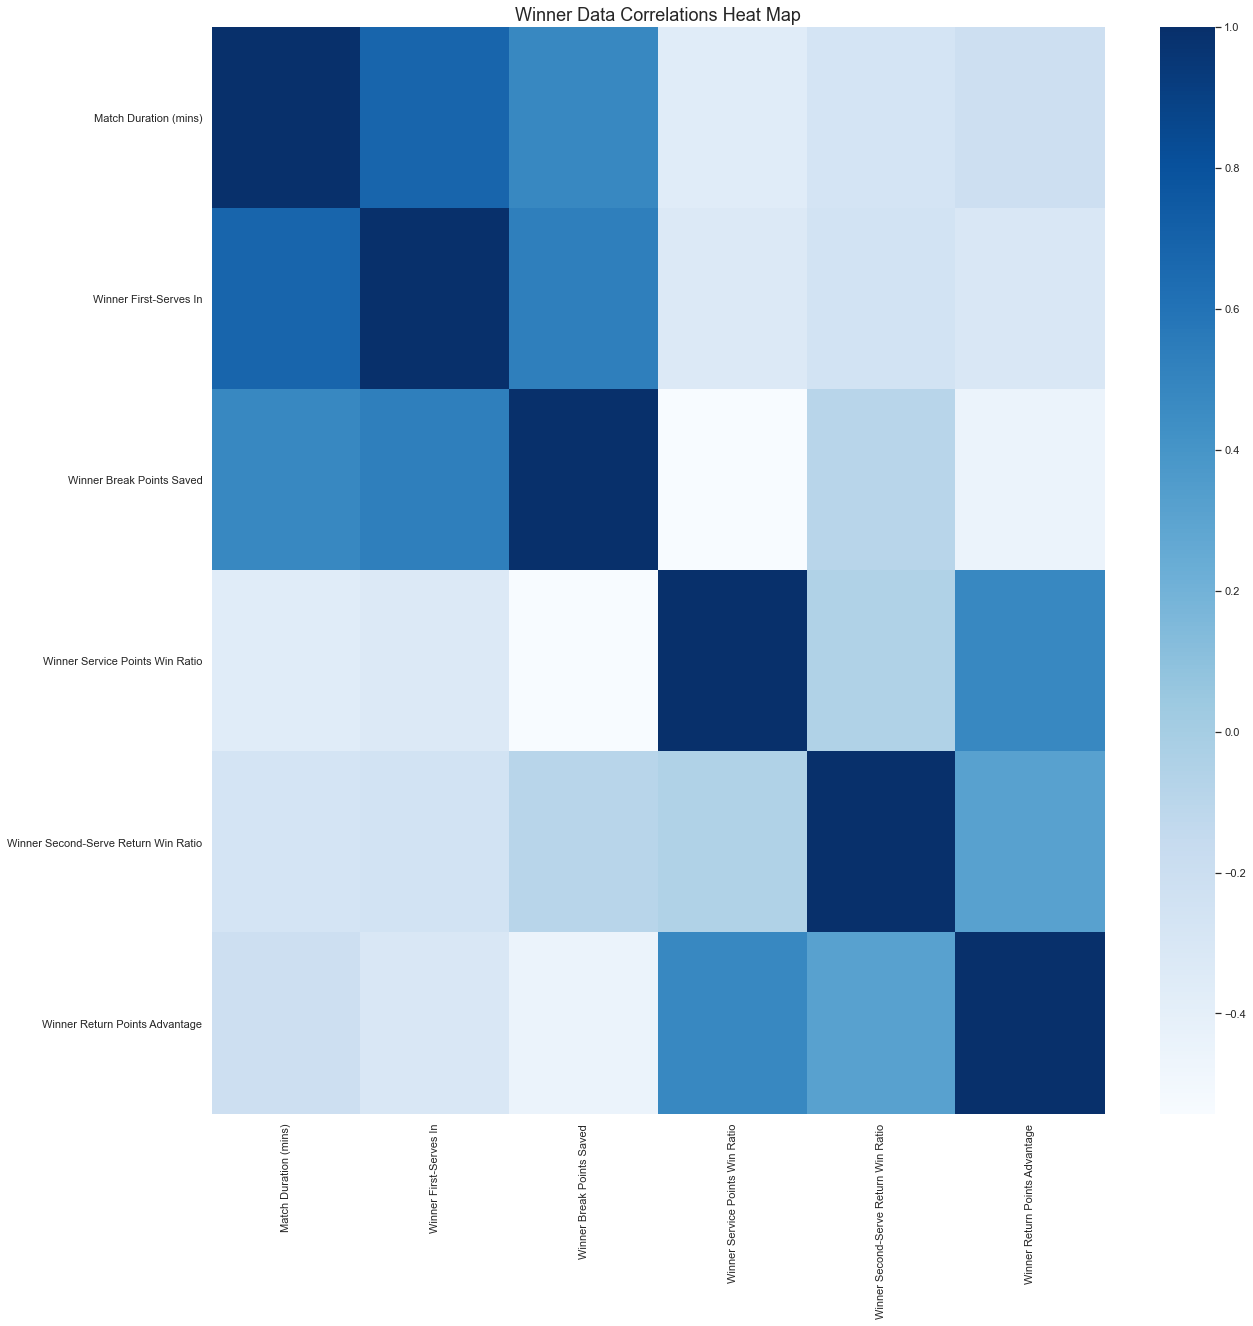

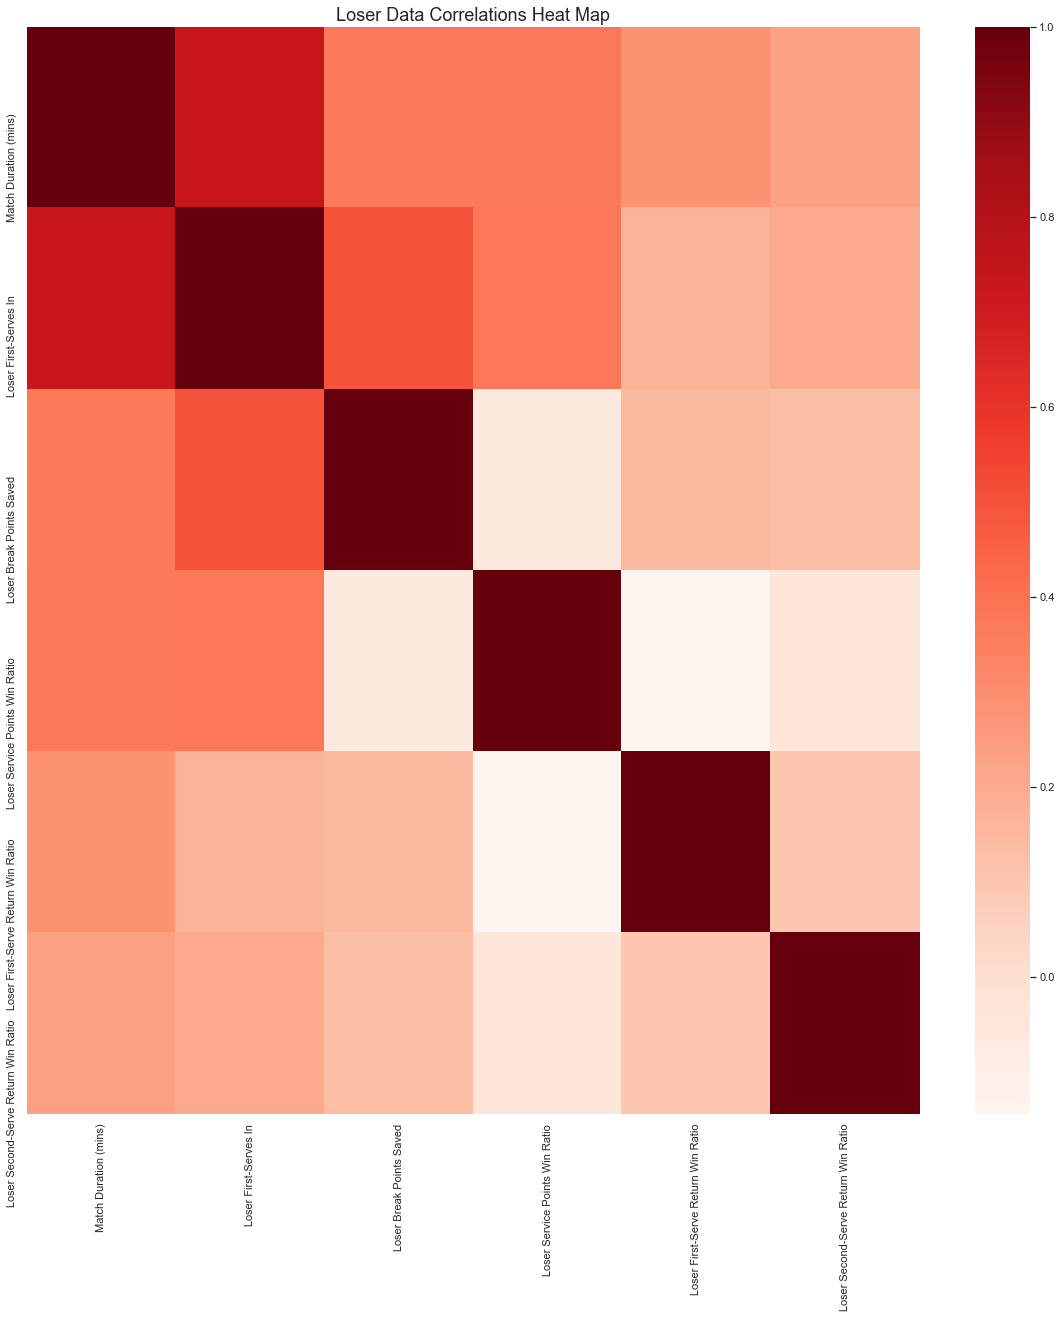

,Match Duration (mins),Winner First-Serves In,Winner Break Points Saved,Winner Service Points Win Ratio,Winner Second-Serve Return Win Ratio,Winner Return Points Advantage
Match Duration (mins),1.00000,0.68571,0.47993,-0.36232,-0.27144,-0.20614
Winner First-Serves In,0.68571,1.00000,0.53403,-0.32803,-0.25137,-0.30648
Winner Break Points Saved,0.47993,0.53403,1.00000,-0.54299,-0.09027,-0.45152
Winner Service Points Win Ratio,-0.36232,-0.32803,-0.54299,1.00000,-0.05376,0.47854
Winner Second-Serve Return Win Ratio,-0.27144,-0.25137,-0.09027,-0.05376,1.00000,0.31462
Winner Return Points Advantage,-0.20614,-0.30648,-0.45152,0.47854,0.31462,1.00000


,Match Duration (mins),Loser First-Serves In,Loser Break Points Saved,Loser Service Points Win Ratio,Loser First-Serve Return Win Ratio,Loser Second-Serve Return Win Ratio
Match Duration (mins),1.00000,0.72792,0.37034,0.37590,0.28682,0.23504
Loser First-Serves In,0.72792,1.00000,0.49811,0.38244,0.16783,0.20413
Loser Break Points Saved,0.37034,0.49811,1.00000,-0.05962,0.14866,0.13277
Loser Service Points Win Ratio,0.37590,0.38244,-0.05962,1.00000,-0.14422,-0.03862
Loser First-Serve Return Win Ratio,0.28682,0.16783,0.14866,-0.14422,1.00000,0.09849
Loser Second-Serve Return Win Ratio,0.23504,0.20413,0.13277,-0.03862,0.09849,1.00000


In [5]:
def insight2():
    
    # ---------- INSIGHT 2 ----------

    # First, since this insight centralizes around correlations, and all information is quantitative (for now),
    # the next step is to take the variables of interest (selection of particular columns helps eliminate
    # known correlations or correlations of no interest). This is outlined below:
    
    t_correlated_winner_data_df = t_math_df.loc[:, ['Match Duration (mins)', 'Winner First-Serves In',\
                                                    'Winner Break Points Saved', 'Winner Service Points Win Ratio',\
                                                    'Winner Second-Serve Return Win Ratio', \
                                                    'Winner Return Points Advantage']]
    
    t_correlated_loser_data_df = t_math_df.loc[:, ['Match Duration (mins)', 'Loser First-Serves In', \
                                                   'Loser Break Points Saved', 'Loser Service Points Win Ratio', \
                                                   'Loser First-Serve Return Win Ratio', \
                                                   'Loser Second-Serve Return Win Ratio']]
    # An important note is that the loser data
    # does not have a Return Points Advantage column,
    # because it would be the converse of the winner's (so no need)
    
    # The next step is to calculate the correlations for analysis,
    # which can be stored in a diagonally-symmetric dataframe by utilizing
    # the return type of the pd.DataFrame.corr() method:
    
    t_math_df_correlations_win = t_correlated_winner_data_df.corr(method = 'pearson').round(5) # pearson is the standard correlation coefficient
    t_math_df_correlations_lose = t_correlated_loser_data_df.corr(method = 'pearson').round(5)
    
    # ---------- VISUALIZATION FOR INSIGHT 2 ----------
    
    # Now we move on to construct the visualization for the dataframe(s).
    # Since we are dealing with correlations, the best visualization for
    # this would be a heat map
    # (shows correlation coefficients between two variables for each data point).
    
    # The first one is for winner data
    
    plt.figure(figsize = (20, 20))
    sns.heatmap(t_math_df_correlations_win, cmap = 'Blues')
    plt.title('Winner Data Correlations Heat Map', fontsize = 18)
    plt.savefig('Winner Data Correlations Heat Map (CSV, Heat Map)')
    plt.show()
    
    # The second one is for loser data
    
    plt.figure(figsize = (20, 20))
    sns.heatmap(t_math_df_correlations_lose, cmap = 'Reds')
    plt.title('Loser Data Correlations Heat Map', fontsize = 18)
    plt.savefig('Loser Data Correlations Heat Map (CSV, Heat Map)')
    plt.show()
    
    # Finally, we return the 2 correlation matrix DataFrames (for winner and loser data)
    
    excel_writer = pd.ExcelWriter('Summary_File_DataFrame_2.xlsx')
    t_math_df_correlations_win.to_excel(excel_writer)
    excel_writer.save()
    
    excel_writer = pd.ExcelWriter('Summary_File_DataFrame_3.xlsx')
    t_math_df_correlations_lose.to_excel(excel_writer)
    excel_writer.save()
    
    return [t_math_df_correlations_win, t_math_df_correlations_lose]
    
############ Function Call ############
list_of_correlation_dfs = insight2()
display(list_of_correlation_dfs[0])
display(list_of_correlation_dfs[1])

### 1.2 Insight Explanation

All explanations were provided in the code itself.

## 1.3 How have prize amounts for ATP Tournaments changed seasonally and yearly?

,Prize Amount
Date,
2010-Q1,23885050
2011-Q1,19710700
2012-Q1,21574289
2013-Q1,20769258
2014-Q1,24611405
2015-Q1,26269600
2016-Q1,28874905
2017-Q1,30621140
2018-Q1,33020300


,Prize Amount
Date,
2010-Q2,15209250
2011-Q2,14576400
2012-Q2,14777050
2013-Q2,18893087
2014-Q2,19514000
2015-Q2,20355630
2016-Q2,22576260
2017-Q2,27539590
2018-Q2,27410795


,Prize Amount
Date,
2010-Q3,220000
2011-Q3,185000
2012-Q3,75000
2013-Q3,92500
2020-Q3,6265155


,Prize Amount
Date,
2010-Q4,217500
2011-Q4,142500
2012-Q4,1864870
2013-Q4,2567310
2014-Q4,100000
2015-Q4,150000
2016-Q4,100000
2017-Q4,100000
2018-Q4,2209135


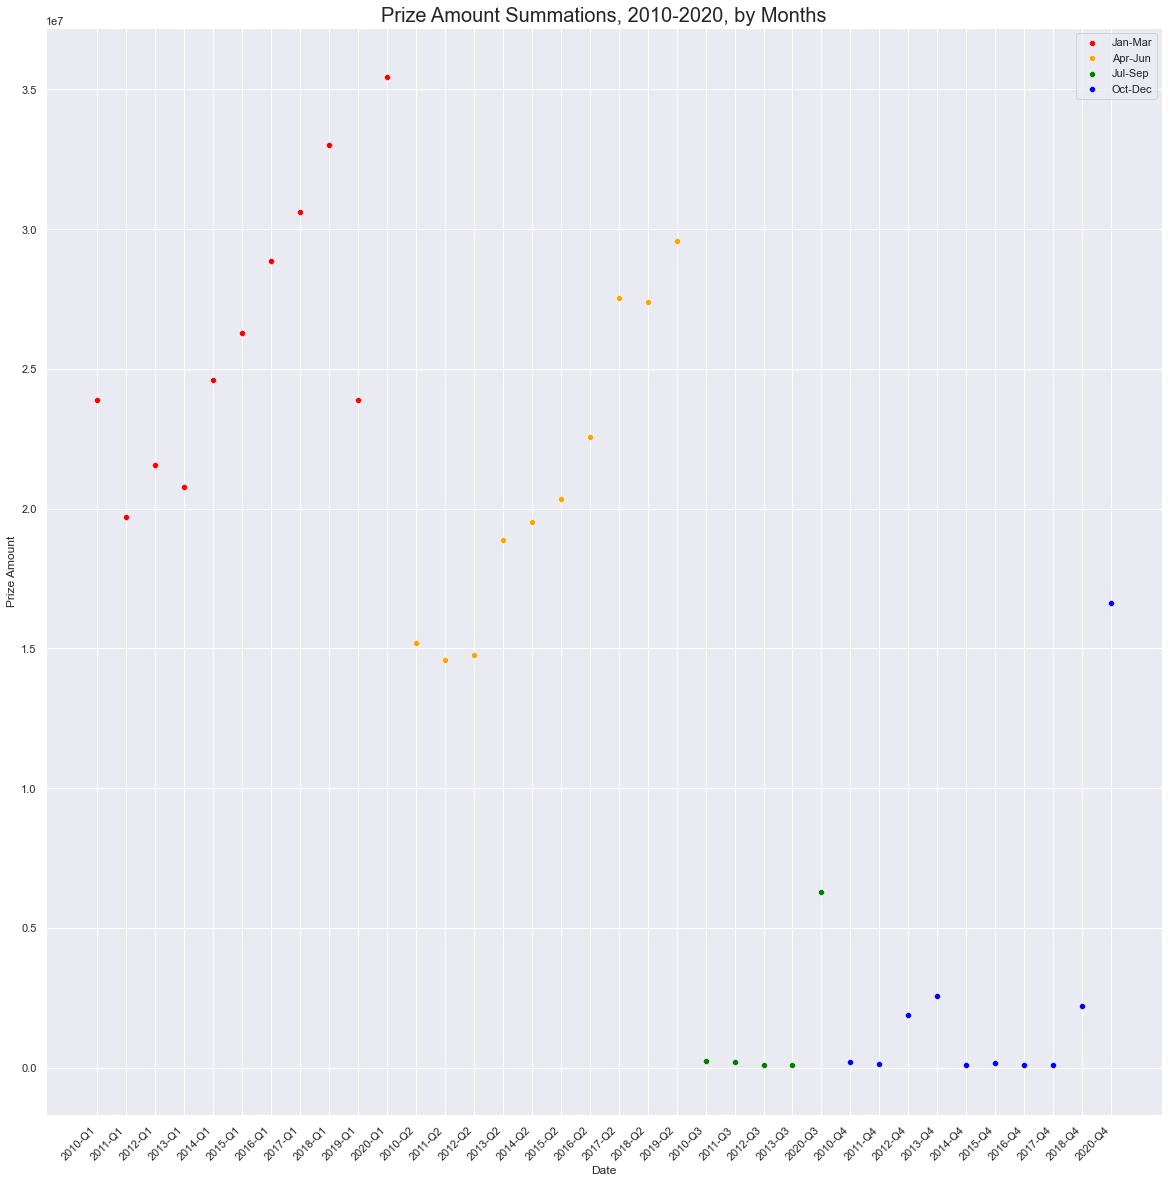

In [413]:
def insight3():
  
    # The first thing is to change the data type, which was forgotten to do
    # in Phase II (and could not do due to a cooldown on the requests allowed to be made)
    
    t_prizes_df = df_api.copy() # Remade while changing the code block
    t_prizes_df = t_prizes_df.iloc[:,1:]
    
    for i in t_prizes_df.index:
        if t_prizes_df.loc[i, 'Date'][-2:] == '01' or \
        t_prizes_df.loc[i, 'Date'][-2:] == '02' or \
        t_prizes_df.loc[i, 'Date'][-2:] == '03':
            t_prizes_df.loc[i, 'Date'] = t_prizes_df.loc[i, 'Date'][:-2] + 'Q1'
        elif t_prizes_df.loc[i, 'Date'][-2:] == '04' or \
        t_prizes_df.loc[i, 'Date'][-2:] == '05' or \
        t_prizes_df.loc[i, 'Date'][-2:] == '06':
            t_prizes_df.loc[i, 'Date'] = t_prizes_df.loc[i, 'Date'][:-2] + 'Q2'
        elif t_prizes_df.loc[i, 'Date'][-2:] == '07' or \
        t_prizes_df.loc[i, 'Date'][-2:] == '08' or \
        t_prizes_df.loc[i, 'Date'][-2:] == '09':
            t_prizes_df.loc[i, 'Date'] = t_prizes_df.loc[i, 'Date'][:-2] + 'Q3'
        else:
            t_prizes_df.loc[i, 'Date'] = t_prizes_df.loc[i, 'Date'][:-2] + 'Q4'
    
    # We then also split the DataFrame into 4 distinct DataFrames completely
    # dependent on which quarter they are in (Q1, Q2, Q3, Q4)...
    # This is for the visualization process along with insight:
    
    t_prizes_Q1_df = pd.DataFrame(columns = ['Date','Prize Amount'])
    t_prizes_Q2_df = pd.DataFrame(columns = ['Date','Prize Amount'])
    t_prizes_Q3_df = pd.DataFrame(columns = ['Date','Prize Amount'])
    t_prizes_Q4_df = pd.DataFrame(columns = ['Date','Prize Amount'])
    
    for i in t_prizes_df.index:
        if t_prizes_df.loc[i, 'Date'][-2:] == 'Q1':
            t_prizes_Q1_df.loc[len(t_prizes_Q1_df.index) + 1] = t_prizes_df.loc[i]
        if t_prizes_df.loc[i, 'Date'][-2:] == 'Q2':
            t_prizes_Q2_df.loc[len(t_prizes_Q2_df.index) + 1] = t_prizes_df.loc[i]
        if t_prizes_df.loc[i, 'Date'][-2:] == 'Q3':
            t_prizes_Q3_df.loc[len(t_prizes_Q3_df.index) + 1] = t_prizes_df.loc[i]
        if t_prizes_df.loc[i, 'Date'][-2:] == 'Q4':
            t_prizes_Q4_df.loc[len(t_prizes_Q4_df.index) + 1] = t_prizes_df.loc[i]
    
    # ---------- INSIGHT 3 ----------
    
    # Since we are dealing with the dates and prize amounts accumulated for
    # each tournament, we want to find the average prize amount generated
    # per each 3 months of each year over a 10-year basis
    
    # Therefore, we will need to group by Date, BUT account for different
    # days in the same quarter. After that, we will need to find the averages
    # of the prize amount per each QUARTER by using .sum() (used over .mean()
    # because total prizes available each quarter-year is more beneficial)
    
    t_prizes_avg_series = t_prizes_df.groupby('Date')['Prize Amount'].mean().round(2)
    t_prizes_avg_df = t_prizes_avg_series.to_frame()
    
    t_prizes_avg_Q1_df = t_prizes_Q1_df.groupby('Date')['Prize Amount'].sum()
    t_prizes_avg_Q2_df = t_prizes_Q2_df.groupby('Date')['Prize Amount'].sum()
    t_prizes_avg_Q3_df = t_prizes_Q3_df.groupby('Date')['Prize Amount'].sum()
    t_prizes_avg_Q4_df = t_prizes_Q4_df.groupby('Date')['Prize Amount'].sum()
    
    t_prizes_avg_Q1_df = t_prizes_avg_Q1_df.to_frame()
    t_prizes_avg_Q2_df = t_prizes_avg_Q2_df.to_frame()
    t_prizes_avg_Q3_df = t_prizes_avg_Q3_df.to_frame()
    t_prizes_avg_Q4_df = t_prizes_avg_Q4_df.to_frame()
    
    # ---------- VISUALIZATION FOR INSIGHT 3 ----------
    
    # Simply setting
    
    sns.set(color_codes = True)
    
    # This is a way to combine 4 different scatterplots on the same axis,
    # which makes the visualization of the trends over the 4 quarter-years
    # over a decade easier to see. This method does result in the 4 plots
    # being set aside one another due to differing Dates on the axes,
    # but it allows an easier view of understanding than otherwise:
    
    plt.figure(figsize = (20,20))
    
    ax = sns.scatterplot(x = 'Date', y = 'Prize Amount', data = t_prizes_avg_Q1_df, color = 'red')
    ax = sns.scatterplot(x = 'Date', y = 'Prize Amount', data = t_prizes_avg_Q2_df, color = 'orange')
    ax = sns.scatterplot(x = 'Date', y = 'Prize Amount', data = t_prizes_avg_Q3_df, color = 'green')
    ax = sns.scatterplot(x = 'Date', y = 'Prize Amount', data = t_prizes_avg_Q4_df, color = 'blue')
    
    plt.legend(labels = ['Jan-Mar', 'Apr-Jun', 'Jul-Sep', 'Oct-Dec'])
    plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light')
    ax.set_title('Prize Amount Summations, 2010-2020, by Months', fontsize = 20)
    plt.savefig('Prize Amount Summations, 2010-2020, by Months (API, 4-Way Scatter)')
    
    # This method ends with the return of the four DataFrames plotted
    
    return [t_prizes_avg_Q1_df, t_prizes_avg_Q2_df, \
            t_prizes_avg_Q3_df, t_prizes_avg_Q4_df,]


############ Function Call ############
list_of_dfs = insight3()
for item in list_of_dfs:
    display(item)

### Insight 3 Explanation

All explanations were provided in the code itself.

## 1.4 What is the concentration of financial earnings for players? How does this change for singles and doubles players?

,Rank,Career Earnings,Singles Earnings,Doubles Earnings,Rank Category
0,1,153520718,7837071,27468,1-50
1,2,130594339,647655,0,1-50
2,3,124961595,1478830,0,1-50
3,4,62281885,481827,6689,1-50
4,5,43280489,0,0,1-50
...,...,...,...,...,...
26038,26027,33,0,0,750+
26039,26027,33,0,0,750+
26040,26027,33,0,0,750+
26041,26027,33,0,0,750+


,Career Earnings
Rank Category,
1-50,1412581687
101-250,845067611
251-500,611131592
501-750,302593208
51-100,515782108
750+,542538584


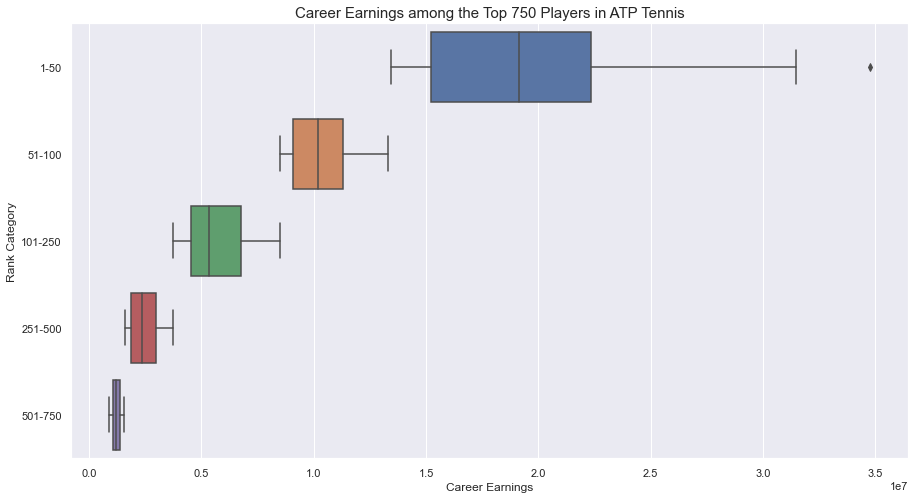

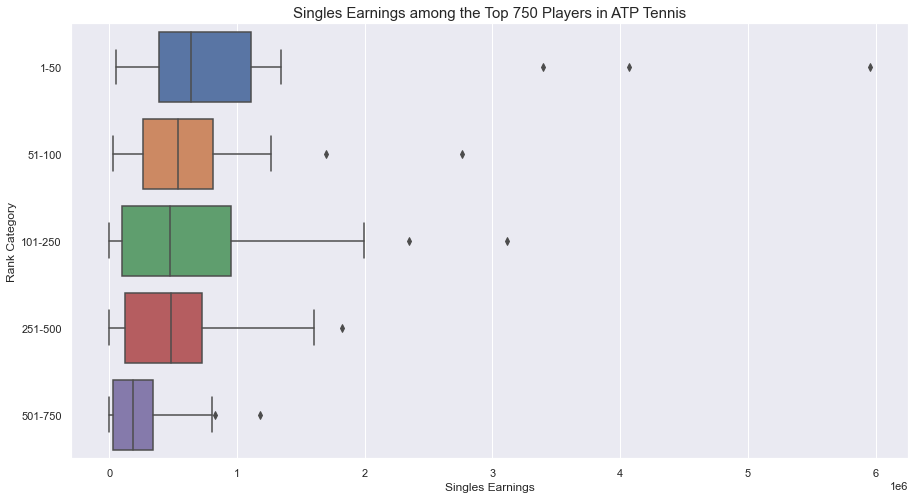

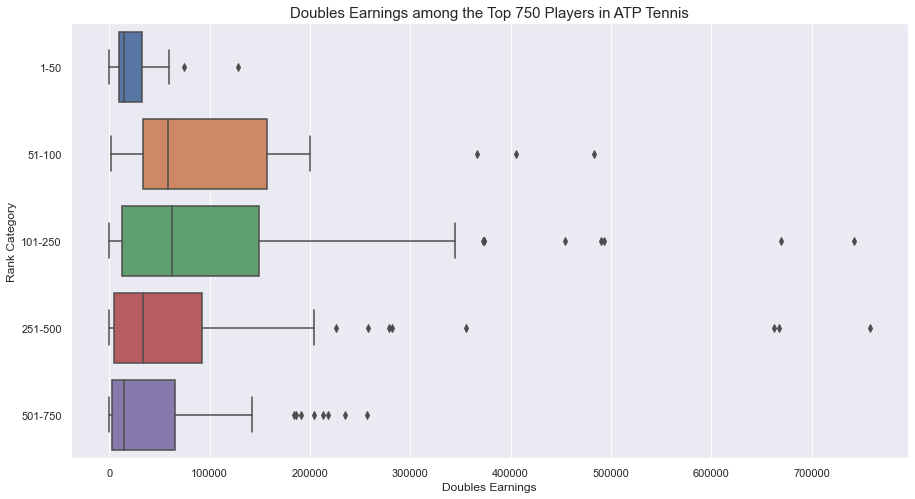

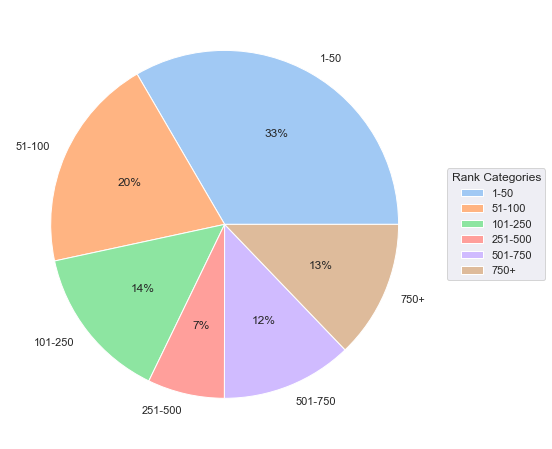

In [6]:
def insight4():

    # ---------- INSIGHT 4 ----------
    
    # The best way to acquire insight on the financial earnings of players
    # without statistical overload is to create distinct box plots
    # based on a bucket of rankings for the player data,
    # which leads to the following categorization of ranking:
    
    t_earns_df = df_add.copy() # Remade while changing the code block
    
    t_earns_df['Rank Category'] = t_earns_df['Rank']
    
    for i in range(len(t_earns_df.index)): # For purpose of construction of visualization
        if i < 50:
            t_earns_df.iloc[i, -1] = '1-50'
        elif i < 100:
            t_earns_df.iloc[i, -1] = '51-100'
        elif i < 250:
            t_earns_df.iloc[i, -1] = '101-250'
        elif i < 500:
            t_earns_df.iloc[i, -1] = '251-500'
        elif i < 750:
            t_earns_df.iloc[i, -1] = '501-750'
        else:
            t_earns_df.iloc[i, -1] = '750+'
    
    t_earns_top_750_df = t_earns_df.iloc[5:750,:] # Ignoring Top 5 (extreme outliers in data)
    
    # I also had to alter the Top 750 DataFrame to acquire information
    # on singles and doubles earnings, which meant I had to flush out any
    # values of 0 earnings (would otherwise mess up the box plots).
    
    t_earns_top_750_s_df = t_earns_top_750_df[t_earns_top_750_df['Singles Earnings'] > 0]
    t_earns_top_750_d_df = t_earns_top_750_df[t_earns_top_750_df['Doubles Earnings'] > 0]
    
    # Finally, to showcase what the Career Earnings of the entire player roster on the ATP
    # looks like, I created a pie chart to show the total salaries earned per each
    # Rank Category. To do that, I first had to group the data by Rank Category.
    
    t_earns_agg_series = t_earns_df.groupby('Rank Category')['Career Earnings'].sum()
    t_earns_agg_df = t_earns_agg_series.to_frame()
    
    # ---------- VISUALIZATION FOR INSIGHT 4 ----------
    
    # For the box plots, I wanted to plot according to Career Earnings, Singles Earnings,
    # and Doubles Earnings, and since each vary in amounts and population, the trends
    # are inferrable different.
    # Therefore, I constructed 3 box plots using the following steps:
    
    plt.figure(figsize = (15,8))
    ax = sns.boxplot(x = 'Career Earnings', y = 'Rank Category', data = t_earns_top_750_df)
    ax.set_title('Career Earnings among the Top 750 Players in ATP Tennis', fontsize = 15)
    plt.savefig('Career Earnings Top 750 (Add, Box Plot)')
    
    plt.figure(figsize = (15,8))
    ax = sns.boxplot(x = 'Singles Earnings', y = 'Rank Category', data = t_earns_top_750_s_df)
    ax.set_title('Singles Earnings among the Top 750 Players in ATP Tennis', fontsize = 15)
    plt.savefig('Singles Earnings Top 750 (Add, Box Plot)')

    plt.figure(figsize = (15,8))
    ax = sns.boxplot(x = 'Doubles Earnings', y = 'Rank Category', data = t_earns_top_750_d_df)
    ax.set_title('Doubles Earnings among the Top 750 Players in ATP Tennis', fontsize = 15)
    plt.savefig('Doubles Earnings Top 750 (Add, Box Plot)')
    
    # I then also constructed a pie chart based on 6 categorical rankings:
    # Ranks 1-50, 51-100, 101-250, 251-500, 501-750, and 750+
    
    plt.figure(figsize = (15,8))
    plt.pie(data = t_earns_agg_df, x = 'Career Earnings', labels = ['1-50', '51-100', '101-250', '251-500', '501-750', '750+'], colors = sns.color_palette('pastel')[0:6], autopct = '%.0f%%')
    plt.legend(labels = ['1-50', '51-100', '101-250', '251-500', '501-750', '750+'], loc = 'center right', title = 'Rank Categories', bbox_to_anchor = (0.75, 0, 0.5, 1))
    plt.savefig('Career Earnings All Top (Add, Pie Chart)')
    
    # Lastly, for a clean view on the DataFrames that were used for visualization,
    # I returned a list of DataFrames for display (note: although 4 DataFrames were
    # used for visualization, I returned 2 because 1 of the DataFrames includes the other
    # 2 DataFrames)
    
    t_earns_df = t_earns_df.iloc[:,1:]
    t_earns_df.drop(['First Name', 'Last Name', 'YTD'], axis = 1, inplace = True)
    
    excel_writer = pd.ExcelWriter('Summary_File_DataFrame_4.xlsx')
    t_earns_df.to_excel(excel_writer)
    excel_writer.save()
    
    return [t_earns_df, t_earns_agg_df]
    
############ Function Call ############
t_earns_list_results = insight4()
for item in t_earns_list_results:
    display(item)

### Insight 4 Explanation

All explanations were provided in the code itself.

## 1.5 How have tennis match characteristics changed over the years?

,"Diff. b/t FS Win, FS Return","Diff. b/t SS Win, SS Return"
Year,,
1991,0.38,0.00
1992,0.39,0.00
1993,0.40,-0.01
1994,0.41,-0.01
1995,0.42,-0.01
1996,0.42,-0.01
1997,0.43,-0.01
1998,0.43,-0.01
1999,0.42,0.00


,Match Duration (mins),Winner First-Serves In,Winner Break Points Saved,Winner First-Serve Points Win Ratio,Winner Second-Serve Points Win Ratio,Winner Service Points Win Ratio,Winner First-Serve Return Win Ratio,Winner Second-Serve Return Win Ratio,"Diff. b/t FS Win, FS Return","Diff. b/t SS Win, SS Return"
Year,,,,,,,,,,
1991,103.61,39.89,3.24,0.74,0.56,0.67,0.36,0.56,0.38,0.00
1992,105.20,42.18,3.29,0.75,0.55,0.67,0.36,0.55,0.39,0.00
1993,92.20,42.17,3.18,0.75,0.55,0.67,0.35,0.56,0.40,-0.01
1994,83.12,41.63,3.18,0.76,0.55,0.67,0.35,0.56,0.41,-0.01
1995,86.65,41.97,3.17,0.76,0.55,0.67,0.34,0.56,0.42,-0.01
1996,88.75,42.20,3.10,0.76,0.55,0.68,0.34,0.56,0.42,-0.01
1997,95.55,43.24,3.16,0.77,0.55,0.67,0.34,0.56,0.43,-0.01
1998,90.90,42.74,3.11,0.77,0.55,0.68,0.34,0.56,0.43,-0.01
1999,98.38,46.78,3.75,0.76,0.56,0.68,0.34,0.56,0.42,0.00


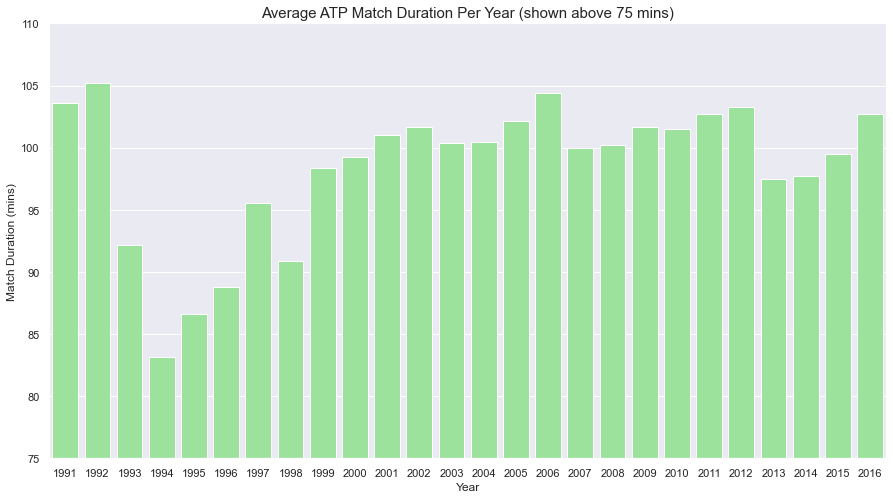

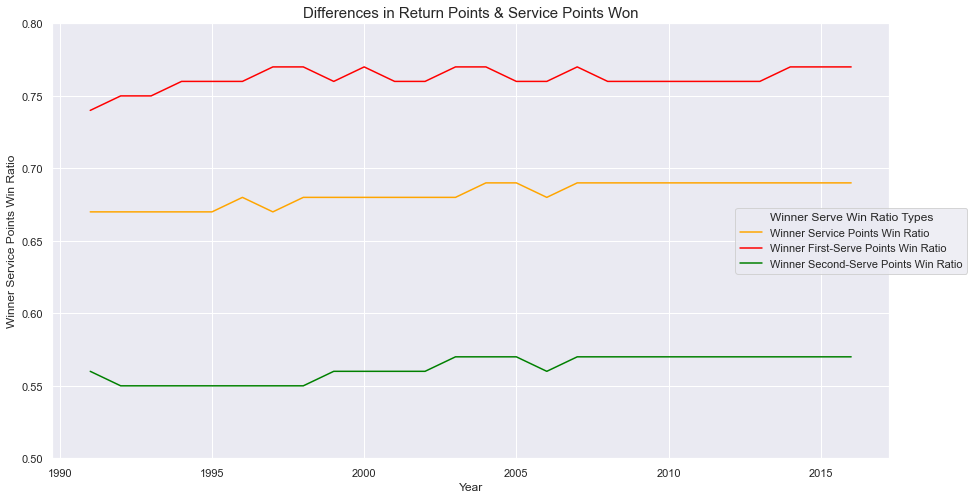

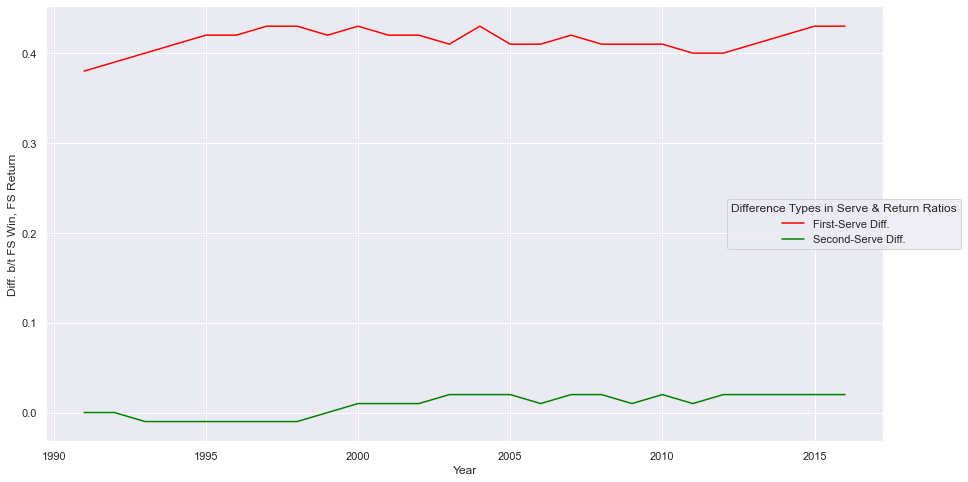

In [419]:
def insight5():
    
    # ---------- INSIGHT 5 ----------
    
    # The first step is to make a copy, since we are revisiting the data
    # acquired from the CSV file, as well as clean the file a bit
    
    t_math_df = df_csv.copy()
    t_math_df = t_math_df.iloc[:, 1:]
    
    # --------------
    # I chose to explore the following characteristics with
    # respect to 'Year' and others in their groups
    # (all are ratios except duration):
    
    # (Match Duration)
    
    # (Winner First-Serve Points Won,
    # Winner Second-Serve Points Won,
    # Winner Service Points Won)
    
    # (Winner First-Serve Returns Won,
    # Winner Second-Serve Return Won)
    # --------------
    
    # Since we are dealing with the relationship of match characteristics
    # to years, we should focus on grouping the data by 'Year'
    
    # Also, since each tournament in each year has a different duration than others,
    # it is important to neutralize the duration effect explored in 1.2.
    # Therefore, we will group by year and take the average of each effect,
    # which will not only negate the duration effect but also give us the
    # average duration for each year
    
    t_math_agg_df = t_math_df.groupby('Year')[['Match Duration (mins)', 'Winner First-Serves In', \
                                          'Winner Break Points Saved', 'Winner First-Serve Points Win Ratio', \
                                          'Winner Second-Serve Points Win Ratio', 'Winner Service Points Win Ratio', \
                                          'Winner First-Serve Return Win Ratio', 'Winner Second-Serve Return Win Ratio']].mean().round(2)
    
    # I also wanted to see the relationship between:
    # (First-Serve Points, First-Serve Returns), (Second-Serve Points, Second-Serve Returns);
    # so I created 2 new columns in the grouped DataFrame for the DIFFERENCE
    # in each pair's ratios (difference chosen b/c easiest to see similarity b/t 2 values).
    
    t_math_agg_df['Diff. b/t FS Win, FS Return'] = t_math_agg_df['Winner First-Serve Points Win Ratio'] - t_math_agg_df['Winner First-Serve Return Win Ratio']
    t_math_agg_df['Diff. b/t SS Win, SS Return'] = t_math_agg_df['Winner Second-Serve Points Win Ratio'] - t_math_agg_df['Winner Second-Serve Return Win Ratio']
    
    t_math_agg_fsss_df = t_math_agg_df.iloc[:,-2:]
    
    # ---------- VISUALIZATION FOR INSIGHT 5 ----------
    
    # The first step is to graph the bar plot that deals with only Match Duration:
    
    plt.figure(figsize = (15,8))
    ax = sns.barplot(x = t_math_agg_df.index, y = 'Match Duration (mins)', data = t_math_agg_df, color = 'lightgreen')
    plt.ylim(75,110) # or ax.set(ylim = (75, 110))
    ax.set_title('Average ATP Match Duration Per Year (shown above 75 mins)', fontsize = 15)
    plt.savefig('Avg Duration Per Year (CSV, Bar Chart)')
    
    # The subsequent visualization is to graph:
    # (Winner First-Serve Points Won,
    # Winner Second-Serve Points Won,
    # Winner Service Points Won)
    
    # To accomplish this, the best choice is to plot 3 line plots on the same axes
    
    plt.figure(figsize = (15,8))
    ax = sns.lineplot(x = 'Year', y = 'Winner Service Points Win Ratio', data = t_math_agg_df, color = 'orange')
    axUP = sns.lineplot(x = 'Year', y = 'Winner First-Serve Points Win Ratio', data = t_math_agg_df, color = 'red')
    axDOWN = sns.lineplot(x = 'Year', y = 'Winner Second-Serve Points Win Ratio', data = t_math_agg_df, color = 'green')
    plt.ylim(0.5, 0.8)
    plt.legend(labels = ['Winner Service Points Win Ratio', 'Winner First-Serve Points Win Ratio', 'Winner Second-Serve Points Win Ratio'], \
               loc = 'center right', title = 'Winner Serve Win Ratio Types', bbox_to_anchor = (0.6, 0, 0.5, 1))
    ax.set_title('Winner Serve Win Ratios Types & Trends', fontsize = 15)
    plt.savefig('Winner Serve Win Ratios Types and Trends (CSV, Line Graphs)')
    
    # Finally, to see the relationships between return points won and service points won
    # at first-serves and second-serves, I followed the steps below for visualizing the
    # differences:
    
    plt.figure(figsize = (15,8))
    axUP = sns.lineplot(data = t_math_agg_fsss_df, x = 'Year', y = 'Diff. b/t FS Win, FS Return', color = 'red')
    axDOWN = sns.lineplot(data = t_math_agg_fsss_df, x = 'Year', y = 'Diff. b/t SS Win, SS Return', color = 'green')
    plt.legend(labels = ['First-Serve Diff.', 'Second-Serve Diff.'], loc = 'center right', title = 'Difference Types in Serve & Return Ratios', bbox_to_anchor = (0.6, 0, 0.5, 1))
    ax.set_title('Differences in Return Points & Service Points Won', fontsize = 15)
    plt.savefig('Diffs in Return Points and Service Points Won (CSV, Line Graphs)')
    
    # The last step is to return the difference DataFrame and the grouped DataFrame
    
    return [t_math_agg_fsss_df, t_math_agg_df]


############ Function Call ############
list_results = insight5()
for item in list_results:
    display(item)

### Insight 5 Explanation

All explanations were provided in the code itself.

## Data Visualizations

- All data visualizations are included with each insight they are respective with.
- They are set as such rather than in their own sections due to an easier, presentable view, as well as a greater feasibility to arrive at conclusions (for both the view and I).
- Each data visualization is best explained in the video.

## Summary File

For the summary file, I exported the outputted DataFrames from Insights 1, 2, and 4 to Excel files within the Insight code itself.

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Seaborn Plotting Introductions: https://seaborn.pydata.org/introduction.html
*   MatPlotLib Plot Types Page: https://matplotlib.org/stable/plot_types/index
*   Stack Overflow (Referenced 2 Times to Solve Errors on Seaborn Visualizations) https://stackoverflow.com/
*   Pandas DataFrame Guide: https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link: https://youtu.be/5Mwz5XBqBCk


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
